In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [75]:
df=pd.read_csv("Algerian_forest_fires_dataset.csv")

In [41]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


## Data Cleaning

In [43]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,127,9
top,1,7,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [44]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [155]:
df.loc[:123,"region"]=0
df.loc[123:,"region"]=1

In [156]:
df[df.isnull().any(axis=1)]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  242 non-null    int64  
 1   RH           242 non-null    int64  
 2   Ws           242 non-null    int64  
 3   Rain         242 non-null    float64
 4   FFMC         242 non-null    float64
 5   DMC          242 non-null    float64
 6   DC           242 non-null    float64
 7   ISI          242 non-null    float64
 8   BUI          242 non-null    float64
 9   FWI          242 non-null    float64
 10  Classes      242 non-null    object 
 11  region       242 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 22.8+ KB


In [158]:
df[['region']]=df[['region']].astype(int)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  242 non-null    int64  
 1   RH           242 non-null    int64  
 2   Ws           242 non-null    int64  
 3   Rain         242 non-null    float64
 4   FFMC         242 non-null    float64
 5   DMC          242 non-null    float64
 6   DC           242 non-null    float64
 7   ISI          242 non-null    float64
 8   BUI          242 non-null    float64
 9   FWI          242 non-null    float64
 10  Classes      242 non-null    object 
 11  region       242 non-null    int32  
dtypes: float64(7), int32(1), int64(3), object(1)
memory usage: 21.9+ KB


In [100]:
# Missing values are not much so we can drop null values rows
df=df.dropna()
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [101]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,0


In [80]:
df=df.drop(124).reset_index(drop=True)

In [81]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire


In [54]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [86]:
# Fix spaces in column names
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [87]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          242 non-null    object
 1   month        242 non-null    object
 2   year         242 non-null    object
 3   Temperature  242 non-null    object
 4   RH           242 non-null    object
 5   Ws           242 non-null    object
 6   Rain         242 non-null    object
 7   FFMC         242 non-null    object
 8   DMC          242 non-null    object
 9   DC           242 non-null    object
 10  ISI          242 non-null    object
 11  BUI          242 non-null    object
 12  FWI          242 non-null    object
 13  Classes      242 non-null    object
dtypes: object(14)
memory usage: 26.6+ KB


## Changing the required columns as intger datatype

In [88]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [89]:
df[['day','month','year','Temperature','RH','Ws']]=df[['day','month','year','Temperature','RH','Ws']].astype(int)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          242 non-null    int32 
 1   month        242 non-null    int32 
 2   year         242 non-null    int32 
 3   Temperature  242 non-null    int32 
 4   RH           242 non-null    int32 
 5   Ws           242 non-null    int32 
 6   Rain         242 non-null    object
 7   FFMC         242 non-null    object
 8   DMC          242 non-null    object
 9   DC           242 non-null    object
 10  ISI          242 non-null    object
 11  BUI          242 non-null    object
 12  FWI          242 non-null    object
 13  Classes      242 non-null    object
dtypes: int32(6), object(8)
memory usage: 20.9+ KB


## Changing the other columns to float


In [63]:
df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']]=df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']].astype(float)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [91]:
objects=[features for features in df.columns if df[features].dtypes=='O']

In [92]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [93]:
for i in objects:
    if i!='Classes':
        df[i]=df[i].astype(float)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int32  
 1   month        242 non-null    int32  
 2   year         242 non-null    int32  
 3   Temperature  242 non-null    int32  
 4   RH           242 non-null    int32  
 5   Ws           242 non-null    int32  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  region       242 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 21.9+ KB


In [103]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
count,242.000000,242.000000,242.0,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,15.822314,7.508264,2012.0,32.152893,62.004132,15.508264,0.763223,77.928099,14.730992,49.601240,4.759504,16.747934,7.063636,0.491736
std,8.809501,1.112888,0.0,3.635545,14.847635,2.808171,2.007354,14.316912,12.393811,47.690192,4.154248,14.229690,7.442923,0.500968
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.250000,14.000000,0.000000,72.375000,5.800000,14.325000,1.400000,6.025000,0.725000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.250000,3.500000,12.450000,4.450000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.750000,17.000000,0.500000,88.300000,20.850000,70.050000,7.275000,22.775000,11.525000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [104]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int32  
 1   month        242 non-null    int32  
 2   year         242 non-null    int32  
 3   Temperature  242 non-null    int32  
 4   RH           242 non-null    int32  
 5   Ws           242 non-null    int32  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  region       242 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 21.9+ KB


In [160]:
df.to_csv('cleaned_dataset.csv',index=False)

In [161]:
df1=pd.read_csv("cleaned_dataset.csv")

In [162]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  242 non-null    int64  
 1   RH           242 non-null    int64  
 2   Ws           242 non-null    int64  
 3   Rain         242 non-null    float64
 4   FFMC         242 non-null    float64
 5   DMC          242 non-null    float64
 6   DC           242 non-null    float64
 7   ISI          242 non-null    float64
 8   BUI          242 non-null    float64
 9   FWI          242 non-null    float64
 10  Classes      242 non-null    object 
 11  region       242 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 22.8+ KB


In [113]:
df1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [114]:
df1.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
237,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
238,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
239,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
240,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
241,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


## Drop the features that not are required

In [116]:
df=df1.drop(['day','month','year'],axis=1)

In [117]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [118]:
df['Classes'].value_counts()

Classes
fire             131
not fire         100
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [119]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [120]:
df['Classes']=df['Classes'].str.strip()

In [122]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [123]:
df['Classes'].value_counts()

Classes
fire        137
not fire    105
Name: count, dtype: int64

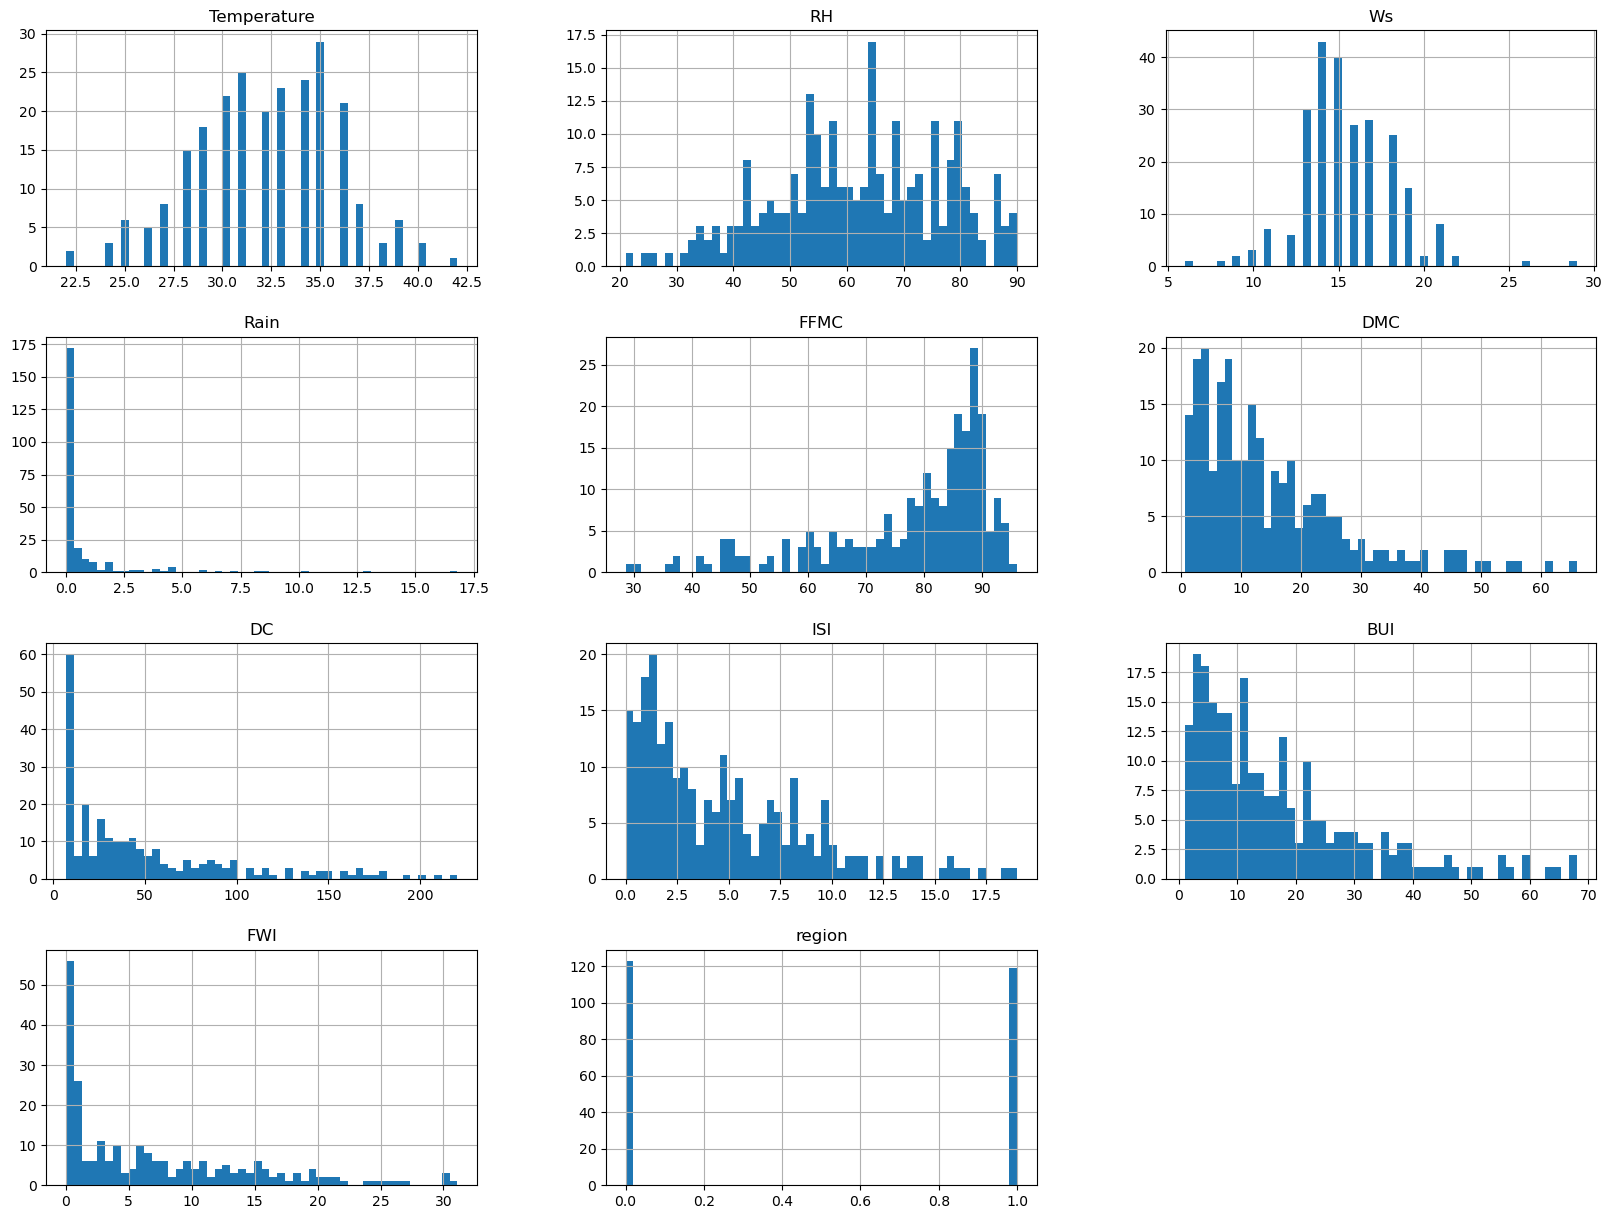

In [126]:
# plt.style.use('seaborn')
df.hist(bins=50,figsize=(20,15))
plt.show()

In [127]:
## Percentage for pie chart
percentage=df['Classes'].value_counts(normalize=True)*100

In [139]:
classlebels=["fire","Not fire"]

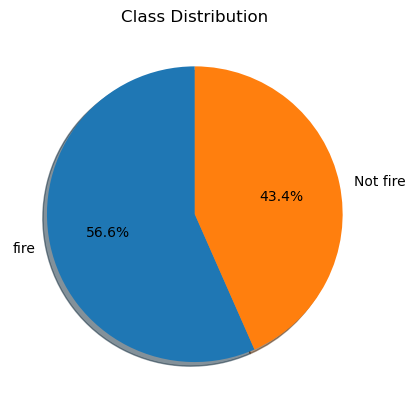

In [141]:
plt.pie(percentage, labels=classlebels, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Class Distribution")
plt.show()

## Conclusion

In [147]:
corr=df.corr(numeric_only=True)
corr

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
Temperature,1.000000,-0.651791,-0.285644,-0.326499,0.679270,0.486494,0.376720,0.604948,0.460533,0.567506,0.275227
RH,-0.651791,1.000000,0.248148,0.222604,-0.644536,-0.407180,-0.225293,-0.686103,-0.352357,-0.580109,-0.412524
Ws,-0.285644,0.248148,1.000000,0.171896,-0.175324,-0.005819,0.075031,0.003408,0.026542,0.027768,-0.169548
Rain,-0.326499,0.222604,0.171896,1.000000,-0.546470,-0.289482,-0.298600,-0.348334,-0.300574,-0.325112,-0.053325
FFMC,0.679270,-0.644536,-0.175324,-0.546470,1.000000,0.601527,0.505185,0.738754,0.589881,0.689822,0.242609
DMC,0.486494,-0.407180,-0.005819,-0.289482,0.601527,1.000000,0.875511,0.679150,0.982178,0.875405,0.205041
DC,0.376720,-0.225293,0.075031,-0.298600,0.505185,0.875511,1.000000,0.506897,0.941809,0.738663,-0.068159
ISI,0.604948,-0.686103,0.003408,-0.348334,0.738754,0.679150,0.506897,1.000000,0.642650,0.922613,0.276777
BUI,0.460533,-0.352357,0.026542,-0.300574,0.589881,0.982178,0.941809,0.642650,1.000000,0.857449,0.101919
FWI,0.567506,-0.580109,0.027768,-0.325112,0.689822,0.875405,0.738663,0.922613,0.857449,1.000000,0.209354


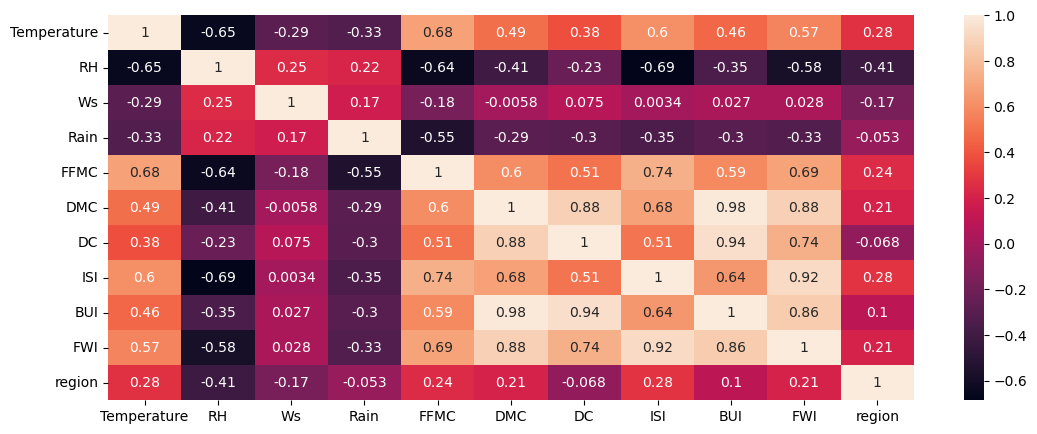

In [151]:
plt.figure(figsize=(13,5))
sns.heatmap(corr,annot=True)
plt.show()

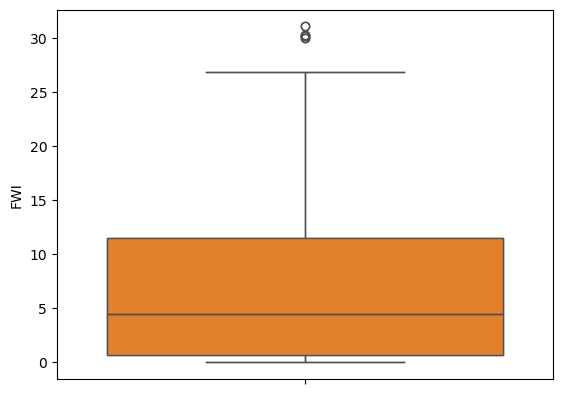

In [153]:
# Box Plot
sns.boxplot(df['FWI'])
plt.show()

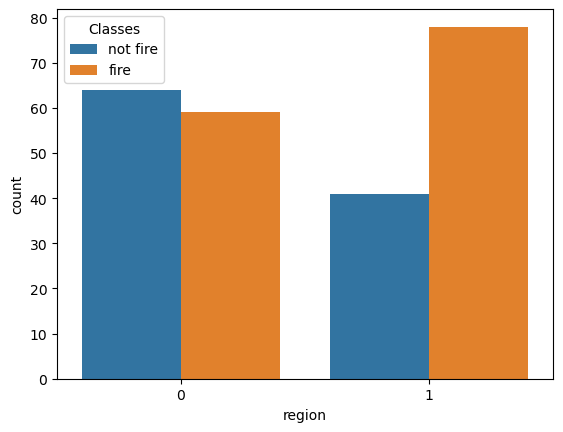

In [173]:
# Monthly fire Analysis
dftemp=df[df['region']==1]
sns.countplot(x='region',hue='Classes',data=df)
plt.show()

In [2]:
df_c=pd.read_csv("cleaned_dataset.csv")

In [3]:
df_c

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
237,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
238,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
239,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
240,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [5]:
df_c.corr(numeric_only=True)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
Temperature,1.000000,-0.651791,-0.285644,-0.326499,0.679270,0.486494,0.376720,0.604948,0.460533,0.567506,0.275227
RH,-0.651791,1.000000,0.248148,0.222604,-0.644536,-0.407180,-0.225293,-0.686103,-0.352357,-0.580109,-0.412524
Ws,-0.285644,0.248148,1.000000,0.171896,-0.175324,-0.005819,0.075031,0.003408,0.026542,0.027768,-0.169548
Rain,-0.326499,0.222604,0.171896,1.000000,-0.546470,-0.289482,-0.298600,-0.348334,-0.300574,-0.325112,-0.053325
FFMC,0.679270,-0.644536,-0.175324,-0.546470,1.000000,0.601527,0.505185,0.738754,0.589881,0.689822,0.242609
DMC,0.486494,-0.407180,-0.005819,-0.289482,0.601527,1.000000,0.875511,0.679150,0.982178,0.875405,0.205041
DC,0.376720,-0.225293,0.075031,-0.298600,0.505185,0.875511,1.000000,0.506897,0.941809,0.738663,-0.068159
ISI,0.604948,-0.686103,0.003408,-0.348334,0.738754,0.679150,0.506897,1.000000,0.642650,0.922613,0.276777
BUI,0.460533,-0.352357,0.026542,-0.300574,0.589881,0.982178,0.941809,0.642650,1.000000,0.857449,0.101919
FWI,0.567506,-0.580109,0.027768,-0.325112,0.689822,0.875405,0.738663,0.922613,0.857449,1.000000,0.209354


In [6]:
df_c

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
237,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
238,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
239,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
240,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [8]:
label_encoder=LabelEncoder()

In [9]:
label_encoder

LabelEncoder()

In [11]:
df_c['Classes']=label_encoder.fit_transform(df_c['Classes'])

In [48]:
df_c.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
Temperature,1.000000,-0.651791,-0.285644,-0.326499,0.679270,0.486494,0.376720,0.604948,0.460533,0.567506,-0.517203,0.275227
RH,-0.651791,1.000000,0.248148,0.222604,-0.644536,-0.407180,-0.225293,-0.686103,-0.352357,-0.580109,0.430794,-0.412524
Ws,-0.285644,0.248148,1.000000,0.171896,-0.175324,-0.005819,0.075031,0.003408,0.026542,0.027768,0.076262,-0.169548
Rain,-0.326499,0.222604,0.171896,1.000000,-0.546470,-0.289482,-0.298600,-0.348334,-0.300574,-0.325112,0.380263,-0.053325
FFMC,0.679270,-0.644536,-0.175324,-0.546470,1.000000,0.601527,0.505185,0.738754,0.589881,0.689822,-0.768069,0.242609
DMC,0.486494,-0.407180,-0.005819,-0.289482,0.601527,1.000000,0.875511,0.679150,0.982178,0.875405,-0.583760,0.205041
DC,0.376720,-0.225293,0.075031,-0.298600,0.505185,0.875511,1.000000,0.506897,0.941809,0.738663,-0.509202,-0.068159
ISI,0.604948,-0.686103,0.003408,-0.348334,0.738754,0.679150,0.506897,1.000000,0.642650,0.922613,-0.733978,0.276777
BUI,0.460533,-0.352357,0.026542,-0.300574,0.589881,0.982178,0.941809,0.642650,1.000000,0.857449,-0.584762,0.101919
FWI,0.567506,-0.580109,0.027768,-0.325112,0.689822,0.875405,0.738663,0.922613,0.857449,1.000000,-0.718067,0.209354


In [230]:
X=df_c.drop(['FWI'],axis=1)
y=df_c['FWI']

In [ ]:
y,X

## Feature Selection

In [232]:
# FEATURE SELECTON ->Removing highly correlated features
def correlation(dataset,threshold):
    col_corr=set()
    corr_mat=dataset.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if abs(corr_mat.iloc[i,j])>threshold:
                col_name=corr_mat.columns[i]
                col_corr.add(col_name)
    return col_corr

In [233]:
corr_features=correlation(X,0.85)

In [234]:
corr_features

{'BUI', 'DC'}

In [235]:
# Drop these features
X.drop(corr_features,axis=1,inplace=True)


In [236]:
X.shape

(242, 9)

## Train test Split 

In [237]:
from sklearn.model_selection import train_test_split

In [238]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=12)

In [239]:
X_train.shape,X_test.shape

((181, 9), (61, 9))

## Feature Scaling Or Standardization

In [240]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [241]:
X_train_scaled

array([[ 1.01612739,  0.6361922 , -0.1642795 , ...,  0.09895258,
        -0.9       ,  1.01671425],
       [ 1.84459162,  0.15410158, -2.26319176, ..., -0.88244011,
         1.11111111,  1.01671425],
       [-0.08849157,  0.36071184, -0.51409821, ..., -0.90697493,
         1.11111111,  1.01671425],
       ...,
       [-1.46926528,  1.1871529 ,  0.18553921, ..., -1.02964902,
         1.11111111,  1.01671425],
       [ 0.46381791, -1.1544301 ,  0.88517662, ...,  1.62011125,
        -0.9       ,  1.01671425],
       [ 1.01612739, -0.46572922, -0.86391692, ..., -0.24453486,
        -0.9       , -0.98356052]])

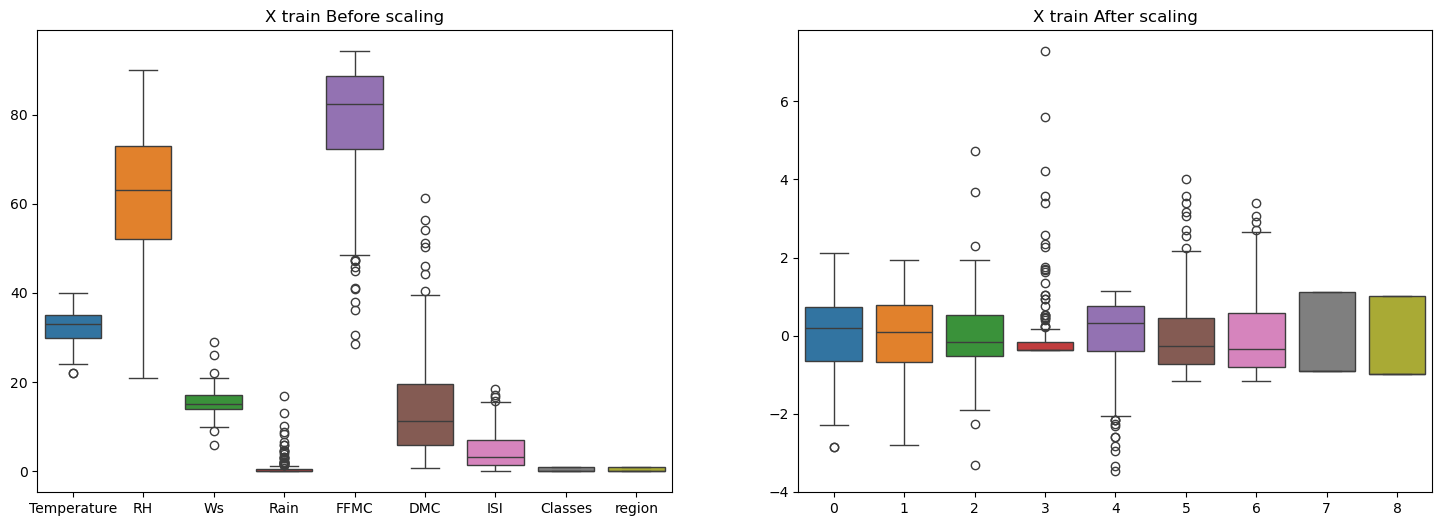

In [242]:
# Box plot to understand effect of Standard Scaler
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.title("X train Before scaling")
sns.boxplot(X_train)
plt.subplot(1,2,2)
plt.title("X train After scaling")
sns.boxplot(X_train_scaled)
plt.show()

## Linear Regression Model

In [243]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

In [244]:
lin_model=LinearRegression()

In [245]:
lin_model

LinearRegression()

In [246]:
lin_model.fit(X_train_scaled,y_train)


LinearRegression()

In [247]:
y_pred=lin_model.predict(X_test_scaled)
y_pred

array([ 9.13678503e+00,  1.39616616e-02,  2.40813139e+01,  2.81372935e+00,
        1.77408013e+01,  5.86763060e+00,  6.87064138e+00,  1.22865889e+01,
        5.21419583e+00, -3.57365735e-01,  4.15881439e-01, -2.61683307e-01,
        1.80496964e+01, -9.45436655e-01,  2.94189523e-01,  6.95702162e+00,
        2.34181748e+01,  1.53943193e+01,  1.18075197e+01,  1.75050265e+01,
        1.62181905e+01,  5.77448301e+00,  1.76648737e+00,  9.17649319e+00,
        2.92945418e+00,  1.34435274e+01,  7.01110851e+00,  2.62270222e-01,
        9.60109172e+00,  1.43747676e+00,  1.20583879e+01,  2.12142244e+01,
        2.44620405e+01, -2.97783399e-01,  6.73096235e+00,  2.62814097e+00,
        2.13633020e+00,  1.43795263e+01, -9.67553944e-02,  1.56544469e+01,
        7.50916708e+00,  3.91270638e-01,  5.01378463e+00,  6.37739695e+00,
        4.38424717e-01,  4.77050602e+00,  5.19531684e+00, -6.26075360e-01,
       -2.03098851e-01,  1.42949525e+01,  1.11409761e+01,  5.24813434e-01,
        2.02982362e-02,  

In [248]:
# Mean absolute error
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("MAE : ",mae)
print("R2 Score : ",score)

MAE :  1.1116787309191323
R2 Score :  0.9287233655747351


## Lasso Regression

In [249]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)


In [250]:
mae=mean_absolute_error(y_test,y_prede)
score=r2_score(y_test,y_pred)
print("MAE : ",mae)
print("R2 Score : ",score)

MAE :  1.412694187712664
R2 Score :  0.9129925654936495


## Ridge Regression

In [254]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("MAE : ",mae)
print("R2 Score : ",score)

MAE :  1.1087688493130998
R2 Score :  0.9296563389449549


array([[ 9.28251359e-01, -2.37895050e-01,  5.24590324e-01,
        -4.35611938e-01,  6.96880286e-01, -2.82832162e-01,
         6.34457918e-01, -8.05387266e-01, -9.83738754e-01],
       [ 9.55552870e-02, -1.73967305e-01, -6.18267167e-01,
        -2.77443318e-01, -5.79327437e-02, -7.09177183e-01,
        -7.24717110e-01,  1.24163870e+00,  1.01653005e+00],
       [ 1.20581672e+00, -5.57533773e-01, -6.18267167e-01,
        -4.35611938e-01,  8.95876449e-01,  3.54716728e+00,
         1.16430581e+00, -8.05387266e-01,  1.01653005e+00],
       [-1.29227150e+00,  2.09599163e-01,  2.42935281e+00,
        -1.19274697e-01, -6.68645104e-01, -3.89418417e-01,
        -7.24717110e-01,  1.24163870e+00, -9.83738754e-01],
       [ 3.73120644e-01, -2.34751062e+00, -9.99219664e-01,
        -4.35611938e-01,  1.09487261e+00,  3.70896871e-01,
         2.13185413e+00, -8.05387266e-01,  1.01653005e+00],
       [-4.59575428e-01,  1.45671418e-01, -6.18267167e-01,
        -4.35611938e-01,  5.11607997e-01,  1.397852

## Elasticnet Regression

In [252]:
from sklearn.linear_model import ElasticNet
ElasticNet=ElasticNet()
ElasticNet.fit(X_train_scaled,y_train)
y_predicted=ElasticNet.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_predicted)
score=r2_score(y_test,y_predicted)
print("MAE : ",mae)
print("R2 Score : ",score)

MAE :  1.8625099055923524
R2 Score :  0.8712997982031472


In [253]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))

In [266]:
ridge.predict(scaler.transform([[ 30	,65,	14,	0.0,	85.4,	16.0	,4.5	,1,	1]]))

array([5.24473195])

## LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

y_prede = log_reg.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_prede))
print("\nClassification Report:\n", classification_report(y_test, y_prede))